In [ ]:
!pip install --upgrade tensorflow tensorflow-probability tf-agents


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 20.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697740 sha256=b3a93e3cc397c8ac06e1a47e8392ebe0315f28387d27c2b659905506667bc84a
  Stored in directory: /root/.cache/pip/wheels/bf/19/ce/d2b762b6d61115bf0b4260ca59650ba2d55d49f34f61e095f6
Successfully built gym
  Attempting uninstall: typing-extensions

In [ ]:
!pip install --upgrade tensorflow-probability

In [ ]:
import tensorflow as tf
print("Version de TensorFlow installée :", tf.__version__)

Version de TensorFlow installée : 2.19.0


In [ ]:
import tf_agents
print("TF-Agents version:", tf_agents.__version__)

TF-Agents version: 0.19.0


In [ ]:
import numpy as np
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.specs import array_spec

env = suite_gym.load('CartPole-v0')
tf_env = tf_py_environment.TFPyEnvironment(env)

print('Observation Spec:')
print(env.time_step_spec().observation)
print('\nAction Spec:')
print(env.action_spec())

# Test avec un acteur aléatoire (version corrigée)
def random_actor(episodes=5):
    for _ in range(episodes):
        time_step = env.reset()
        episode_reward = 0
        while not time_step.is_last():
            # Correction: générer une action aléatoire manuellement
            action = np.random.randint(low=env.action_spec().minimum,
                                      high=env.action_spec().maximum + 1,
                                      dtype=env.action_spec().dtype)
            time_step = env.step(action)
            episode_reward += time_step.reward
        print(f'Episode reward: {episode_reward}')

random_actor()

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])

Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)
Episode reward: 10.0
Episode reward: 21.0
Episode reward: 27.0
Episode reward: 10.0
Episode reward: 18.0


In [ ]:
from tf_agents.agents.dqn import dqn_agent
from tf_agents.networks import q_network
from tf_agents.utils import common
import tensorflow as tf



fc_layer_params = (100, 50)

q_net = q_network.QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    fc_layer_params=fc_layer_params
)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    q_network=q_net,                  # Notre réseau Q
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter
)

agent.initialize()

print("Agent DQN créé avec succès!")
print(f"Architecture du réseau: {fc_layer_params}")
print(f"Optimiseur: Adam (lr=1e-3)")

Agent DQN créé avec succès!
Architecture du réseau: (100, 50)
Optimiseur: Adam (lr=1e-3)


step = 20200: loss = 47979.734375
step = 20400: loss = 77149.3828125
step = 20600: loss = 270291.59375
step = 20800: loss = 566664.875
step = 21000: loss = 17348.166015625
step = 21000: Average Return = 200.0
step = 21200: loss = 77141.984375
step = 21400: loss = 22331.109375
step = 21600: loss = 545332.8125
step = 21800: loss = 51946.484375
step = 22000: loss = 61595.8359375
step = 22000: Average Return = 200.0
step = 22200: loss = 154794.875
step = 22400: loss = 303551.1875
step = 22600: loss = 89586.7890625
step = 22800: loss = 40844.36328125
step = 23000: loss = 24364.794921875
step = 23000: Average Return = 200.0
step = 23200: loss = 1582038.375
step = 23400: loss = 320231.71875
step = 23600: loss = 737434.9375
step = 23800: loss = 581066.625
step = 24000: loss = 1518842.375
step = 24000: Average Return = 200.0
step = 24200: loss = 2187137.5
step = 24400: loss = 36122.125
step = 24600: loss = 821713.75
step = 24800: loss = 41468.4921875
step = 25000: loss = 1107936.75
step = 25000

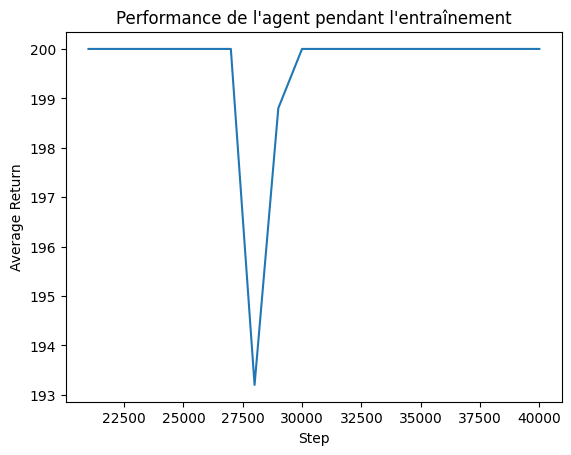

Return final moyen après entraînement: 200.0


In [ ]:
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.metrics import tf_metrics
from tf_agents.eval import metric_utils
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt
from tf_agents.trajectories import trajectory  # <-- Import manquant


# Paramètres du replay buffer
replay_buffer_capacity = 100000
batch_size = 64

# Création du replay buffer
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=replay_buffer_capacity
)

# Collecte initiale de données avec une politique aléatoire
initial_collect_steps = 1000
random_policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())

def collect_step(environment, policy, buffer):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    next_time_step = environment.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    buffer.add_batch(traj)

for _ in range(initial_collect_steps):
    collect_step(tf_env, random_policy, replay_buffer)

# Dataset pour l'entraînement
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2
).prefetch(3)

iterator = iter(dataset)

# Paramètres d'entraînement
num_eval_episodes = 10
num_iterations = 20000
collect_steps_per_iteration = 1
log_interval = 200
eval_interval = 1000

# Métriques
train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric(),
]

def compute_avg_return(environment, policy, num_episodes=10):
    total_return = 0.0
    for _ in range(num_episodes):
        time_step = environment.reset()
        episode_return = 0.0

        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return

    avg_return = total_return / num_episodes
    return avg_return.numpy()[0]

# Boucle d'entraînement
returns = []
for _ in range(num_iterations):
    # Collecte d'étapes
    for _ in range(collect_steps_per_iteration):
        collect_step(tf_env, agent.collect_policy, replay_buffer)

    # Échantillonnage du buffer et entraînement
    experience, _ = next(iterator)
    train_loss = agent.train(experience).loss

    step = agent.train_step_counter.numpy()

    if step % log_interval == 0:
        print(f'step = {step}: loss = {train_loss}')

    if step % eval_interval == 0:
        avg_return = compute_avg_return(tf_env, agent.policy, num_eval_episodes)
        print(f'step = {step}: Average Return = {avg_return}')
        returns.append((step, avg_return))

# Visualisation des résultats
steps = [r[0] for r in returns]
avg_returns = [r[1] for r in returns]

plt.plot(steps, avg_returns)
plt.xlabel('Step')
plt.ylabel('Average Return')
plt.title('Performance de l\'agent pendant l\'entraînement')
plt.show()

# Évaluation finale
final_return = compute_avg_return(tf_env, agent.policy, num_eval_episodes)
print(f'Return final moyen après entraînement: {final_return}')